In [1]:
import pandas as pd

# Load the uploaded dataset
file_path = "creditcard_fault.csv"
df = pd.read_csv(file_path)


### 1. 기본 정보를 확인하고 변수의 의미와 데이터 타입 파악하기 
변수의 의미를 알고있을 경우에는 데이터 분석에 불필요한 특성을 보고 제외할 수 있음   
Q: 데이터 기본정보를 살펴보고 불필요 변수를 파악하고 제거하세요.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

Feature 삭제 코드 작성하기

In [3]:
df.drop('______', axis=1, inplace=True)

### 2. 결측치 처리
Q: 결측치 여부를 판단하고 결측치를 처리하세요.

In [ ]:
missing_ratio = df.isnull().sum() / len(df) * 100
print(missing_ratio)


결측치 처리 코드 작성하기

### 3. 수치형 변수 처리
Q1: 이상치 감지 및 제거 (자유롭게 판단)   
Q2: 어떤 특성은 다른 데이터와 특별히 다른 분포를 갖습니다. 적절히 처리해보세요.

In [6]:
import matplotlib.pyplot as plt

# 수치형 변수 찾기
numeric_columns = df.select_dtypes(include=['number']).columns
print(numeric_columns)

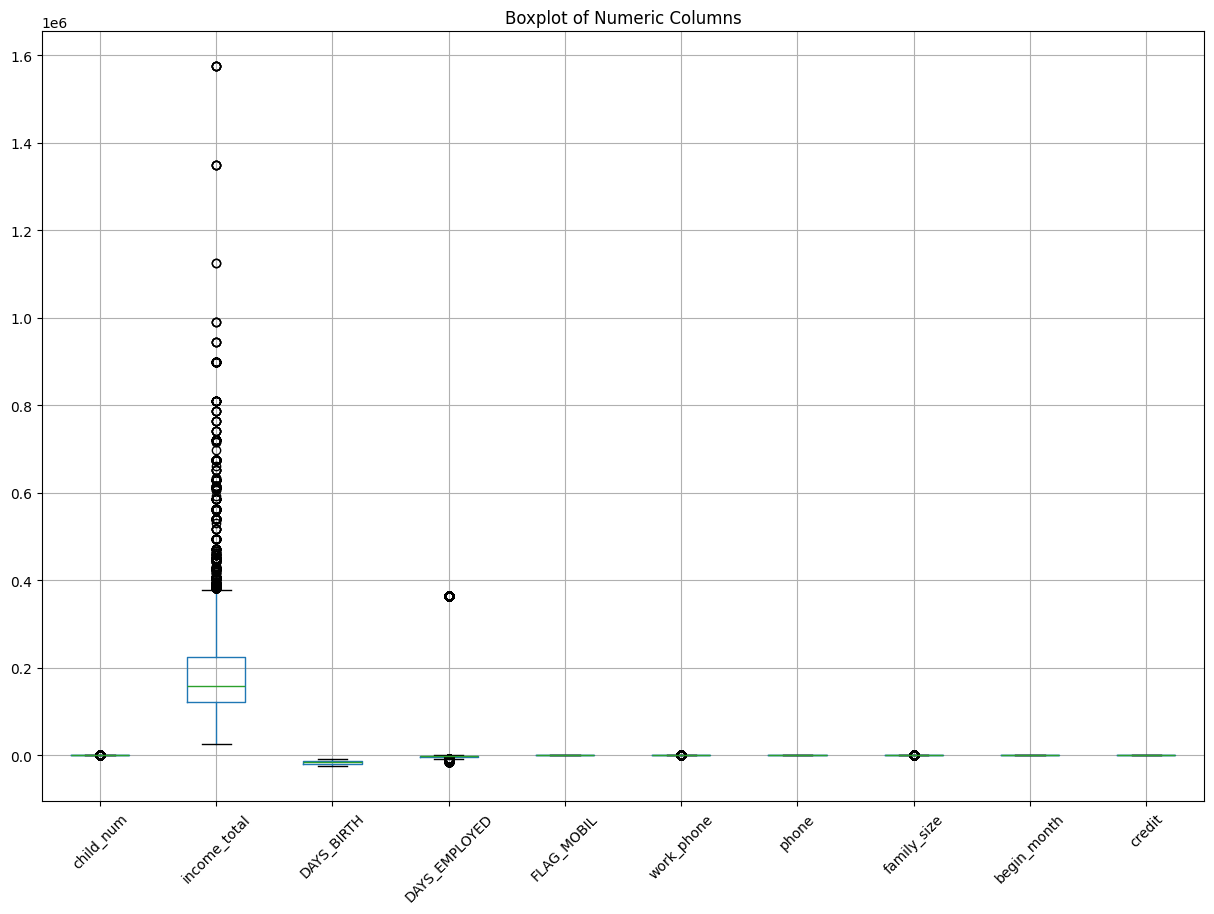

In [7]:
plt.figure(figsize=(15, 10))
df[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()

Q1 문제 해결 코드 작성하기

Q2 문제 해결 코드 작성하기

### 4. 날짜와 시간에 관련된 특성 처리
Q: 날짜와 시간과 관련한 데이터를 찾고 적절한 조치를 취하세요.   
예) 일 수 -> 년   (이렇게하면 어떤 이득이 있는지 생각해보세요.)

In [ ]:
import matplotlib.pyplot as plt

# days_employed 변수의 분포를 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['DAYS_EMPLOYED'], bins=50, edgecolor='k')
plt.title('Distribution of days_employed')
plt.xlabel('days_employed')
plt.ylabel('Frequency')
plt.show()


In [ ]:

# days_birth 변수의 분포를 시각화
plt.figure(figsize=(10, 6))
plt.hist(df['DAYS_BIRTH'], bins=50, edgecolor='k')
plt.title('Distribution of days_birth')
plt.xlabel('days_birth')
plt.ylabel('Frequency')
plt.show()

날짜/시간 과 관련된 변수에 대한 처리를 하고 아래 그림과 같은 결과가 나오도록 시각화 하세요.

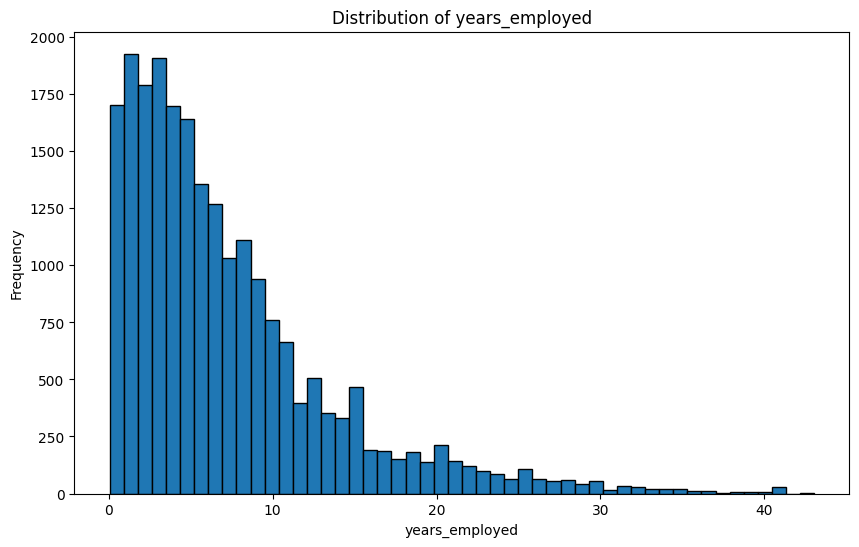

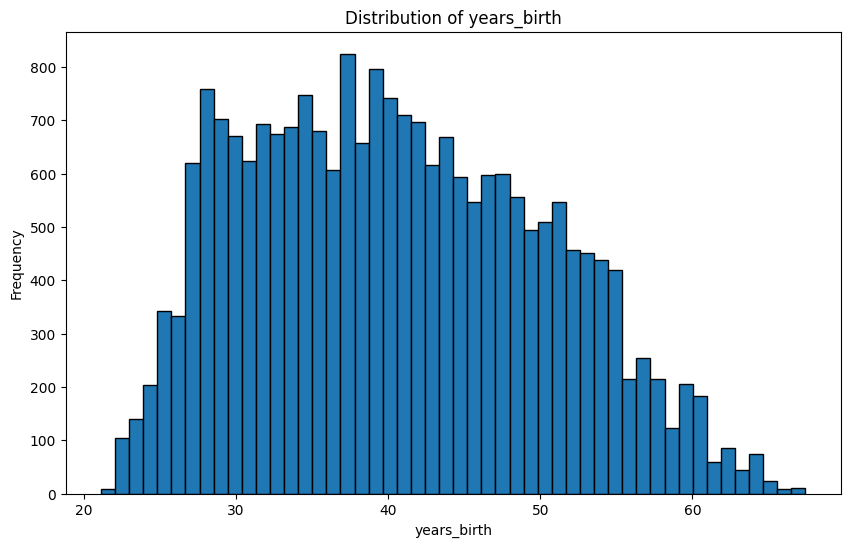

In [13]:
# 코드 작성

### 5. 범주형 데이터 처리
범주형데이터를 숫자형태로 처리하기 위해 대표적인 방식은 one-hot encoding, Labeling 이 있습니다.   
Q: from sklearn.preprocessing import LabelEncoder 의 사용법을 숙지하고 범주형 데이터를 labeling 형식으로 바꾸세요.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 코드 작성

In [14]:
# 결과 확인
df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,work_phone,phone,occyp_type,family_size,begin_month,credit
0,0,0,0,0,12.218500,0,1,1,2,38.079452,12.901370,1,0,0,18,2.0,-6.0,1.0
1,0,0,1,1,12.419170,0,4,0,1,31.178082,4.219178,1,0,0,8,3.0,-5.0,1.0
2,1,1,1,0,13.017005,4,1,1,1,52.293151,12.147945,1,0,1,10,2.0,-22.0,2.0
3,0,0,1,0,12.218500,0,4,1,1,41.336986,5.731507,1,0,1,14,2.0,-37.0,0.0
4,0,1,1,0,11.967187,2,1,1,1,41.197260,5.767123,1,0,0,10,2.0,-26.0,2.0


# EDA 진행하기

### 1. 수치형 변수 분석하기
Q: 나이, 경력, 소득, 가족수, 카드발급 일 수 에 따른 데이터 특성을 시각화하고 분석하세요. (결과를 해석해보세요.)

In [ ]:
for col in ['YEARS_BIRTH', 'YEARS_EMPLOYED', 'income_total', 'family_size', 'begin_month']:
    plt.figure(figsize=(8, 4))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

Q2: 수치형 변수들 간에 상관관계 분석을 실행하세요.   
다중공선성을 제거하세요.

In [ ]:
# 코드 작성하기

In [17]:
# 다중공선성 제거 코드 작성

### 2. 범주형 데이터 분석 하기
Q: 아래 코드를 실행하고 결과를 분석하세요.

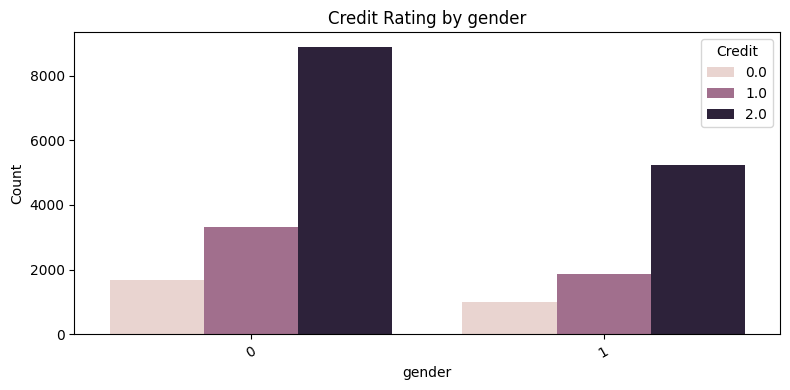

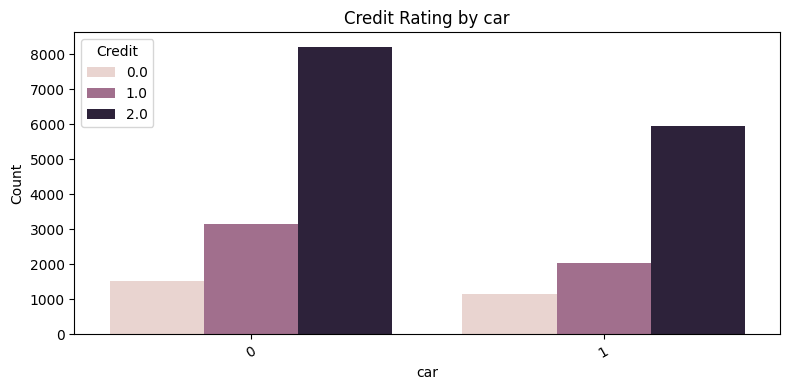

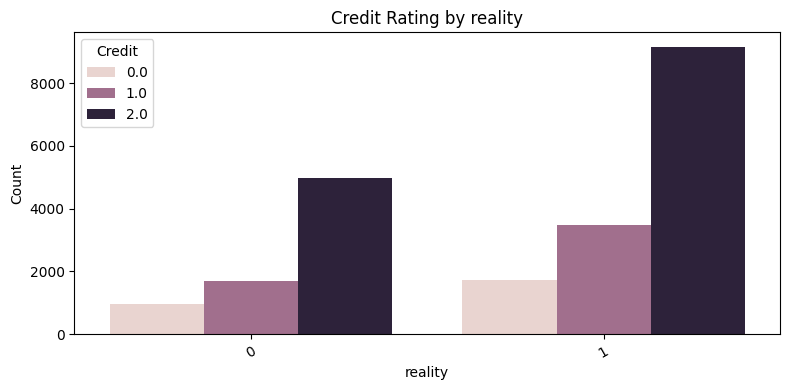

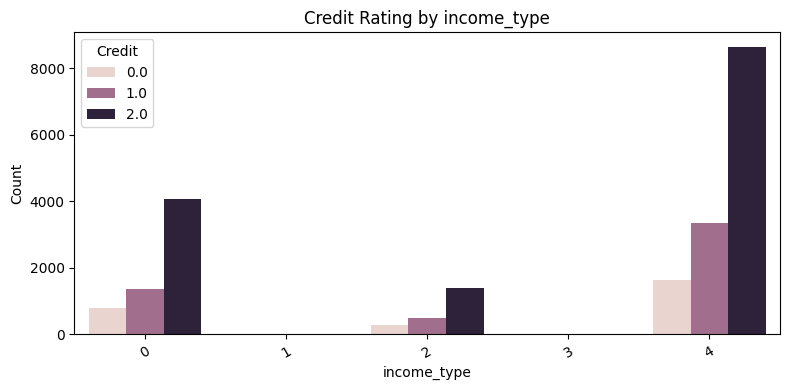

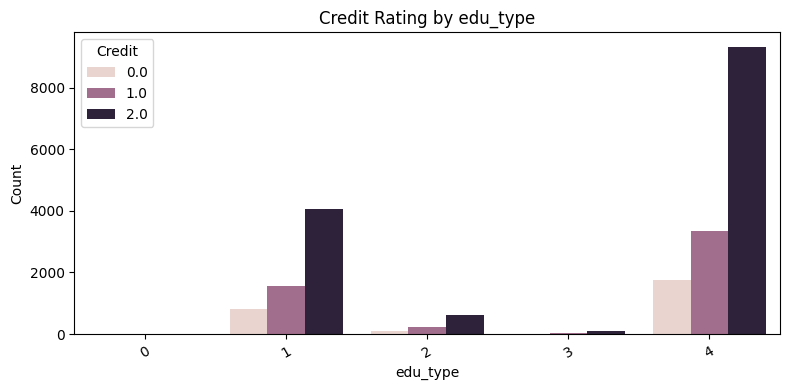

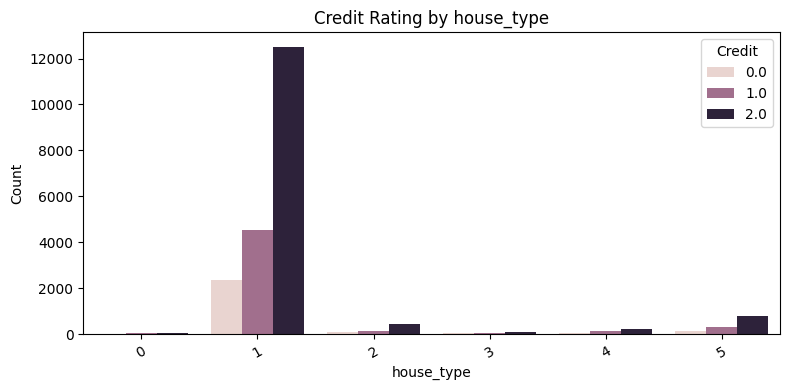

In [19]:
import seaborn as sns

categorical_cols = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'house_type']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='credit', data=df)
    plt.title(f'Credit Rating by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.legend(title='Credit')
    plt.tight_layout()
    plt.show()


# 모델 학습하기

#### 모델 추천

0. 베이스 라인(로지스틱회귀)

1. 랜덤 포레스트   
&emsp;- 범주형/수치형 변수 모두 잘 처리   
&emsp;- 결측치 약간 있어도 견고함

2. XGBoost   
&emsp;- 클래스 불균형에 강하고, 하이퍼파라미터 튜닝시 매우 강력함 (튜닝 필요)

Q: 데이터를 학습|테스트셋으로 8:2 비율로 나누는 코드를 작성하세요. (random_state=42 설정, stratiry=y 설정)

In [ ]:
# 코드 작성


Q: Logistic Regression, RandomFrestClassifier, XGBClassifier 모델에 대해 학습하고 평가하세요.   
평가는 다음 라이브러리를 사용하세요: from sklearn.metrics import accuracy_score, classification_report 

In [ ]:
# 코드 작성하기


Q: 가장 성능이 좋은 모델을 선정하고 feature importance를 시각화하세요.

Q: 모델의 성능을 높이기 위한 조치를 생각해보고 성능을 높여보세요. 